# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
ＮＴＴ
任天堂
三井住友ＦＧ
リクルート
中外薬
ＫＤＤＩ
伊藤忠
ＳＢ
ＳＢＧ
三菱商
東京海上
東エレク
三菱重
ＪＴ
みずほＦＧ
信越化
三井物
ホンダ
武田
第一三共
富士通
キヤノン
ＯＬＣ
ＨＯＹＡ
['7203', '6758', '8306', '6501', '9983', '6861', '9432', '7974', '8316', '6098', '4519', '9433', '8001', '9434', '9984', '8058', '8766', '8035', '7011', '2914', '8411', '4063', '8031', '7267', '4502', '4568', '6702', '7751', '4661', '7741']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,9432,7974,8316,6098,...,8411,4063,8031,7267,4502,4568,6702,7751,4661,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.984000,0.969175,0.992380,0.994455,...,0.992525,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.983333,0.975975,0.980088,1.001085,...,0.978256,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,0.992000,1.027199,0.985988,0.993370,...,0.986410,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.973799,0.994573,0.989588,0.967552,0.970787,...,0.960362,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.945819,0.981683,0.923372,0.932891,0.924312,...,0.917554,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.936115,0.980326,0.932049,0.920354,0.940488,...,0.917101,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935145,0.968114,0.951685,0.904867,0.977064,...,0.908494,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.898916,0.966757,0.920632,0.835300,0.961251,...,0.836240,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.884522,0.977612,0.911225,0.768191,0.896910,...,0.742242,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.883865


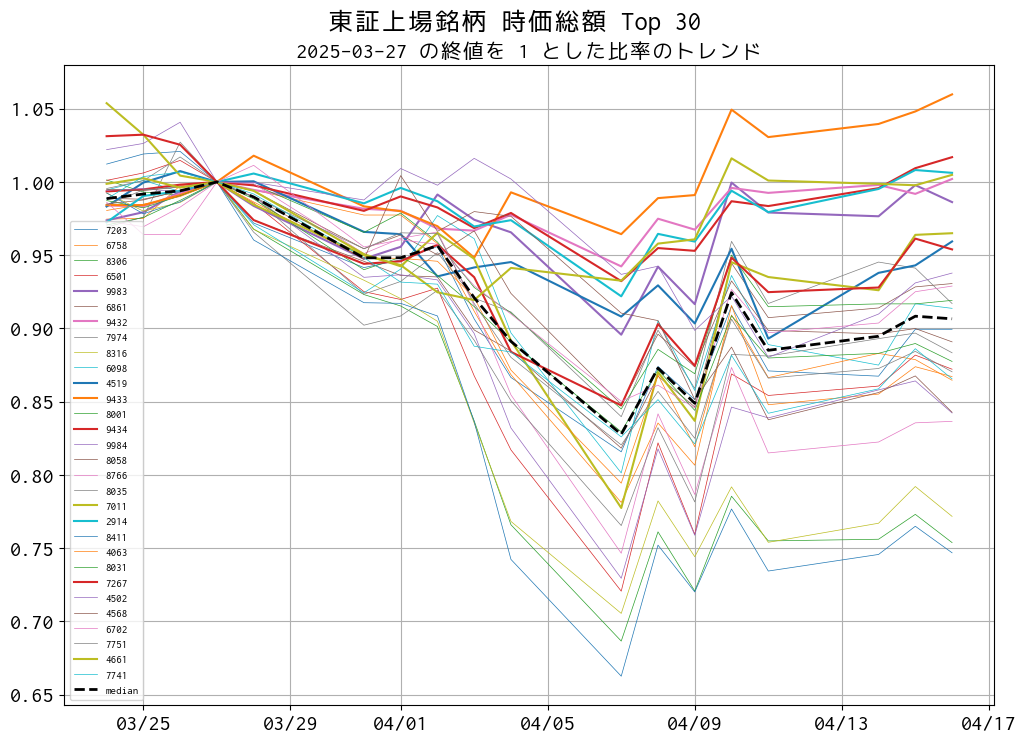

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '4519':
            width = 1.5
            lstyle = 'solid'
        case '7011':
            width = 1.5
            lstyle = 'solid'
        case '7267':
            width = 1.5
            lstyle = 'solid'
        case '9983':
            width = 1.5
            lstyle = 'solid'
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [8]:
for code in ['9433', '9434', '2914', '4661', '9432', '9983', '7011', '4519', '7267']:
    get_code_into(code)
    print()

9433 KDDI Corporation
2025-04-14    1.039592
2025-04-15    1.048135
2025-04-16    1.059804
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-14    0.995767
2025-04-15    1.009407
2025-04-16    1.016933
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-14    0.995210
2025-04-15    1.008144
2025-04-16    1.006228
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-14    0.998710
2025-04-15    0.997742
2025-04-16    1.004839
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-14    0.997965
2025-04-15    0.991859
2025-04-16    1.002035
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-14    0.976559
2025-04-15    0.997849
2025-04-16    0.986237
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-14    0.926044
2025-04-15    0.963869
2025-04-16    0.964998
Name: Close, dtype: float64

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-14    0.937917
2025-04-15    0.943032
2025-04-16    0.959

In [9]:
summary

,7203,6758,8306,6501,9983,6861,9432,7974,8316,6098,...,8411,4063,8031,7267,4502,4568,6702,7751,4661,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.984000,0.969175,0.992380,0.994455,...,0.992525,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.983333,0.975975,0.980088,1.001085,...,0.978256,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,0.992000,1.027199,0.985988,0.993370,...,0.986410,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.973799,0.994573,0.989588,0.967552,0.970787,...,0.960362,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.945819,0.981683,0.923372,0.932891,0.924312,...,0.917554,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.936115,0.980326,0.932049,0.920354,0.940488,...,0.917101,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935145,0.968114,0.951685,0.904867,0.977064,...,0.908494,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.898916,0.966757,0.920632,0.835300,0.961251,...,0.836240,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.884522,0.977612,0.911225,0.768191,0.896910,...,0.742242,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.883865


In [10]:
summary.tail(1).iloc[0]

7203    0.899406
6758    0.867082
8306    0.753730
6501    0.872124
9983    0.986237
6861    0.930616
9432    1.002035
7974    0.916979
8316    0.771632
6098    0.913689
4519    0.959369
9433    1.059804
8001    0.919127
9434    1.016933
9984    0.842250
8058    0.890807
8766    0.836511
8035    0.883356
7011    0.964998
2914    1.006228
8411    0.746772
4063    0.864593
8031    0.877435
7267    0.953938
4502    0.937780
4568    0.842730
6702    0.928918
7751    0.870351
4661    1.004839
7741    0.865499
Name: 2025-04-16 00:00:00, dtype: float64

In [11]:
summary.median(axis=1)

2025-03-24    0.988628
2025-03-25    0.991767
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989738
2025-03-31    0.948183
2025-04-01    0.948237
2025-04-02    0.956507
2025-04-03    0.920925
2025-04-04    0.891153
2025-04-07    0.827678
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.885028
2025-04-14    0.894629
2025-04-15    0.908320
2025-04-16    0.906548
dtype: float64